# Problematic:  Are actors that started their career young more successful?
## Secondary question:
* #### Qu'est ce qui defini la celébrité d'un acteur?
* #### A quel age les acteur vive generalment leur plus grand sucess?
* #### Combien dure la pointe de la carière des acteur?
* #### A quel age les grand acteur ont fait leur début?
* #### Est ce que l'age des début d'un acteur joue influence ces possibilité de réucir sa carrière?

## Importation de dataset

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colonne_name_movis = ['Wiki_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Release_date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
data_movie = pd.read_csv("movie_metadata.tsv", sep='\t', header=None, names=colonne_name_movis)

colonne_name_character = ['Wiki_movie_ID', 'Freebase_movie_ID', 'Release_date', 'Character_name', 'Birthday', 'Gender', 'Actor_height[m]', 'Actor_ethnicity','Actor_name','Actor_age','character/actor','character_ID','actor_ID']
data_character = pd.read_csv("character.metadata.tsv", sep='\t', header=None, names=colonne_name_character)

display(data_movie)

,Wiki_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Recherche d'un subset des donnés qui pourrais mener la recherche  à bien.
#### La base de donnée que nous posedons est très vaste. Il parais très complexe de trouver un modèle pouvant décrir à la fois une carière d'une célébritée anglaise des année 40 et d'un acteur célèbre au japon dans les année 2000. Nous somme donc réstrain à limité notre recherche sur un sous-ensemble des données plus homogène et compréancible.
#### De plus, beaucoup de donnée utile peuvent être menquante.
#### Si après nous analysons notre base de donné pour la restraindre de la meilleur magnière.

### Donnée utile pour la problématique
#### Tout d'abbord il nous faut définir quel donnés precise nous interesse dans la base de donnée. Par la suite nous nous interesrons au succes des acteurs par le billait du succes de leurs filme il peut donc s'averer utile d'avoir les revenue des filme pour cette analyse.
#### Notre analyse ce porte énormément sur la mesure temporelle, nous voulons savoir l'age des acteur, le temps deleur carière,ladatedeleur première filme, etc... Il nousest donc primordiale de savoir la date de sortie des filme qu'on analysera.
#### Vu qu'on s'interesse au acteur il nous est d'aucune utilitée de garder dans notre base de donnée les filmes dont on connais pas les acteur donné.
#### _Affichons les statistique de ces 3 grandeur ci dessous:_

In [3]:
nb_movies = len(data_movie)

nb_movies_with_revenu = data_movie['Revenue'].count()
nb_movies_with_date = data_movie['Release_date'].count()
nb_movies_with_actor = len(data_movie[data_movie['Wiki_movie_ID'].isin(data_character['Wiki_movie_ID'])])

print(f"Revenue: \t{(nb_movies_with_revenu / nb_movies) * 100 :.2f}%")
print(f"Date: \t\t{(nb_movies_with_date / nb_movies) * 100 :.2f}%")
print(f"Actor: \t\t{(nb_movies_with_actor / nb_movies) * 100 :.2f}%")

Revenue: 	10.28%
Date: 		91.56%
Actor: 		78.70%


#### Nous voyons à ces chiffre que la magoritée des filme ont une date de parution et au moins un acteur qui y joue. Parcontre l'absance de beaucoup de revenu est inquetante, nous allons donc essayer de caractérisé les filme a revenue manquant.
#### _Avent de commencer une recherche sur les rvenus éléminons de notre base de donnée  les filme qui ne contienne pas de date ou d'acteur de toute magnière il nous serons d'aucune utilitée:_
#### _Nous métrons égalment en forme les dates desparussion pour qu'il aille toute le meme format (année-mois-jour)_

In [4]:
data_movie_restricted= data_movie[data_movie['Wiki_movie_ID'].isin(data_character['Wiki_movie_ID'])]#suprimé les filme qui n'ont pas d'acteur

#Verifier si on a suprimé les filme qui ne contenais pas de date
nb_movies_restricted = len(data_movie_restricted)
nb_movies_with_date = data_movie_restricted['Release_date'].count()
print(f"Date present in films containing at least one actor: \t\t{(nb_movies_with_date / nb_movies_restricted) * 100 :.2f}%")

data_movie_restricted = data_movie_restricted.dropna(subset=['Release_date'])#suprimé les donnée sans date

#verifier si on a supprimer des filmes sans revenue
nb_movies_restricted = len(data_movie_restricted)
nb_movies_with_revenu = data_movie_restricted['Revenue'].count()

print(f"Revenue presents in movies with date and actor: \t\t{(nb_movies_with_revenu / nb_movies_restricted) * 100 :.2f}%")

#Mise en forme des date
data_movie_restricted['Release_date'] = data_movie_restricted['Release_date'].apply(lambda x: str(x) + '-01' if len(str(x)) == 7 else x)#ajoute un mois et un jour au filme qui en ont pas
data_movie_restricted['Release_date'] = data_movie_restricted['Release_date'].apply(lambda x: str(x) + '-01-01' if len(str(x)) == 4 else x)#ajoute un mois et un jour au filme qui en ont pas
data_movie_restricted['Release_date'] = pd.to_datetime(data_movie_restricted['Release_date'], errors='coerce')#convertieles date en format de date
data_movie_restricted = data_movie_restricted.sort_values(by='Release_date')#classe lesdonnée en fonction de date

Date present in films containing at least one actor: 		94.24%
Revenue presents in movies with date and actor: 		13.48%


#### Au chiffre ci dessus on vois qu'en supprimant les filme sans date et acteur nous avons égalment suprimé un nombre considérable de filme sans revenu
#### _Maintenent que tout nos filme on des date qui sont au bon format, poursuivons en analysant les revenues manquants sur un axe temporelle:_

In [5]:
df = data_movie_restricted

#calcule d'intervale pour le histagramme
df['Yare'] = df['Release_date'].dt.year# création d'une colonne uniqument avec l'année
categories = pd.cut(df['Yare'], bins=range(1880, 2016, 10), right=False)
# Compter le nombre de films par intervalle de 10 ans
nombre_de_films_par_intervalles = categories.value_counts().sort_index()

df_revenu = df.dropna(subset=['Revenue'])#supprime de la liste les filme qui n'on pas de revenu

categories_revenue = pd.cut(df_revenu['Yare'], bins=range(1880, 2016, 10), right=False)
# Compter le nombre de films par intervalle de 10 ans
nombre_de_films_revenue_par_intervalles = categories_revenue.value_counts().sort_index()

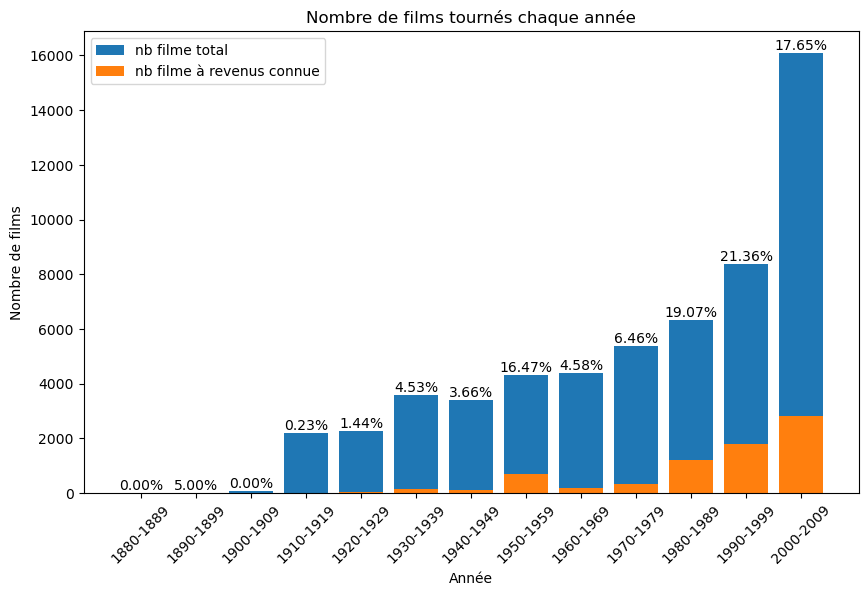

In [6]:
plt.figure(figsize=(10, 6))

# Tracer le graphique (Nombre de films tournés chaque année)
barres_bleues=plt.bar([f'{b.left}-{b.right-1}' for b in nombre_de_films_par_intervalles.index], nombre_de_films_par_intervalles.values, label='nb filme total')
barres_oranges=plt.bar([f'{b.left}-{b.right-1}' for b in nombre_de_films_revenue_par_intervalles.index], nombre_de_films_revenue_par_intervalles.values, label='nb filme à revenus connue')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.title('Nombre de films tournés chaque année')
plt.tick_params(axis='x', rotation=45)
plt.legend()

# Ajouter le rapport au-dessus de chaque barre
for i, barre_bleue in enumerate(barres_bleues):
    hauteur_barre_bleue = barre_bleue.get_height()
    hauteur_barre_orange = barres_oranges[i].get_height()
    rapport = hauteur_barre_orange/hauteur_barre_bleue *100
    plt.text(barre_bleue.get_x() + barre_bleue.get_width() / 2, hauteur_barre_bleue + 5, f'{rapport:.2f}%', ha='center', va='bottom')

# Afficher le graphe
plt.show()

#### Nous voyons que pour les vieux filme nous avons très peu de donnéetplus on avance dans le temps plus le pourcetage des filmeavec revenu connue augmente. Il peux donc être une bonne idée deprendre dans notre analyseuniqument les filme résant? Nous parlerons dans notre projet de carière d'acteur donc il serais preferable d'avoir des données au moin pour 50-60ans, nous pouvons donc envisager de prendre les filme uniqument à partir des année 60.
#### _Essayons:_

In [7]:
data_movie_restricted_1960 = data_movie_restricted[data_movie_restricted['Release_date'].dt.year >= 1960]

#display(data_movie_restricted_1960)

#verifier si on a supprimer des filmes sans revenue
nb_movies_restricted_60 = len(data_movie_restricted_1960)
nb_movies_with_revenu = data_movie_restricted['Revenue'].count()

print(f"Revenue present in films more resistant than the year 1960 \t\t{(nb_movies_with_revenu / nb_movies_restricted_60) * 100 :.2f}%")

Revenue present in films more resistant than the year 1960 		18.26%


#### Nous avons un peu augmenté le pourcentage mais il reste néomoin très faible. Essayons de voir si la presencede d'information de revenu dépent de l'origine du filme.
#### _Representons les filmes aillant leur revenuen fonction de leur pays et leur lange de version originale._

In [8]:
def sort_words(documents):
    """ 
    Description:
        This function removes repetitions from the list lines provided to it,
        transforms the two-dimensional list into a simple list, then sorts the 
        elements alphabetically
    Args:
        documents (list[list[str]]): A list of tokanized text (each line contains the words of a text)
    Returns:
        list[str]:  List sorted in alphabetical order, the number of repetitions of each element 
                    corresponds to the number of texts where it is present
    """
    words_list = []
    
    for document in documents:
        words_selected = list(set(document)) #remove repetition by line
        words_list.append(words_selected) # glue everything into a 2D matrix
    
    return sorted([item for sublist in words_list for item in sublist]) #glue everything into 1D matrix and sort by alphabet

def create_words_database(liste):
    """ 
    Description:
        This function creates a database which lists all the words in the list given as input and their number of repetitions
        !!!! ATTENTION the entry list must be sorted
    Args:
        liste (list[str]):  Sorted word list with repetition
    Returns:
        database:  Database which associates each word with the number of repetitions in the list
    """
    database = {} # sum all the repetitions and output a database like idf but without log and divided
    for words in liste:
        if words in database:
            database[words] += 1
        else:
            database[words] = 1
    return database

In [9]:
df = data_movie_restricted_1960.copy()
#mise en forme des pays maintenent c'est des liste de String
df['Countries'] = df['Countries'].str.extract(r'\"([\w\s]+)\"')
df['Countries'] = df['Countries'].apply(lambda x: [x] if pd.notna(x) else ['Unknown'])

#décomte des filme tourné par chaque pays
contries_list = df['Countries'].tolist()
stored_contries = sort_words(contries_list)#applatie les liste de pays et met la liste dans l'ordre
nombre_de_films_par_pays = create_words_database(stored_contries)#compte le nb de repetition de chaque pays
nombre_de_films_par_pays = dict(sorted(nombre_de_films_par_pays.items(), key=lambda item: item[1]))#classe les pays par ordre croisant de filme tourné

nombre_de_films_par_pays = {pays: valeurs for pays, valeurs in nombre_de_films_par_pays.items() if valeurs >= 100}#suprimme les pays qui ont tournémoin de 100 filmes
print(nombre_de_films_par_pays)

#décomte des filmes tourné avec revenu connu par chaque pays
contries_list = df.dropna(subset=['Revenue'])['Countries'].tolist()
stored_contries = sort_words(contries_list)#applatie les liste de pays et met la liste dans l'ordre
nombre_de_films_par_pays_revenu = create_words_database(stored_contries)#compte le nb de repetition de chaque pays
nombre_de_films_par_pays_revenu = dict(sorted(nombre_de_films_par_pays_revenu.items(), key=lambda item: item[1]))#classe les pays par ordre croisant de filme tourné

pays_100_film = list(nombre_de_films_par_pays.keys())
nombre_de_films_par_pays_revenu = {pays: valeurs for pays, valeurs in nombre_de_films_par_pays_revenu.items() if pays in pays_100_film}
nombre_de_films_par_pays_revenu.update({pays: 0 for pays in pays_100_film if pays not in nombre_de_films_par_pays_revenu})
nombre_de_films_par_pays_revenu = {pays: nombre_de_films_par_pays_revenu[pays] for pays in nombre_de_films_par_pays}
print(nombre_de_films_par_pays_revenu)
#nombre_de_films_par_pays = {pays: valeurs for pays, valeurs in nombre_de_films_par_pays.items() if valeurs >= 100}#suprimme les pays qui ont tournémoin de 100 filmes

{'Russia': 111, 'Pakistan': 112, 'Switzerland': 114, 'Brazil': 115, 'Yugoslavia': 122, 'Thailand': 127, 'Ireland': 130, 'Turkey': 138, 'Norway': 141, 'Finland': 153, 'Netherlands': 162, 'Poland': 168, 'West Germany': 177, 'China': 204, 'Argentina': 218, 'Sweden': 239, 'Soviet Union': 243, 'Denmark': 258, 'Mexico': 285, 'Philippines': 289, 'Germany': 306, 'Spain': 515, 'Australia': 585, 'South Korea': 664, 'Italy': 940, 'Hong Kong': 945, 'Canada': 1015, 'Japan': 1436, 'United Kingdom': 2281, 'Unknown': 2461, 'France': 2711, 'India': 6567, 'United States of America': 18885}
{'Russia': 13, 'Pakistan': 0, 'Switzerland': 7, 'Brazil': 6, 'Yugoslavia': 0, 'Thailand': 8, 'Ireland': 19, 'Turkey': 24, 'Norway': 2, 'Finland': 8, 'Netherlands': 2, 'Poland': 3, 'West Germany': 1, 'China': 10, 'Argentina': 7, 'Sweden': 6, 'Soviet Union': 0, 'Denmark': 11, 'Mexico': 20, 'Philippines': 0, 'Germany': 14, 'Spain': 27, 'Australia': 59, 'South Korea': 249, 'Italy': 23, 'Hong Kong': 47, 'Canada': 68, 'Japa

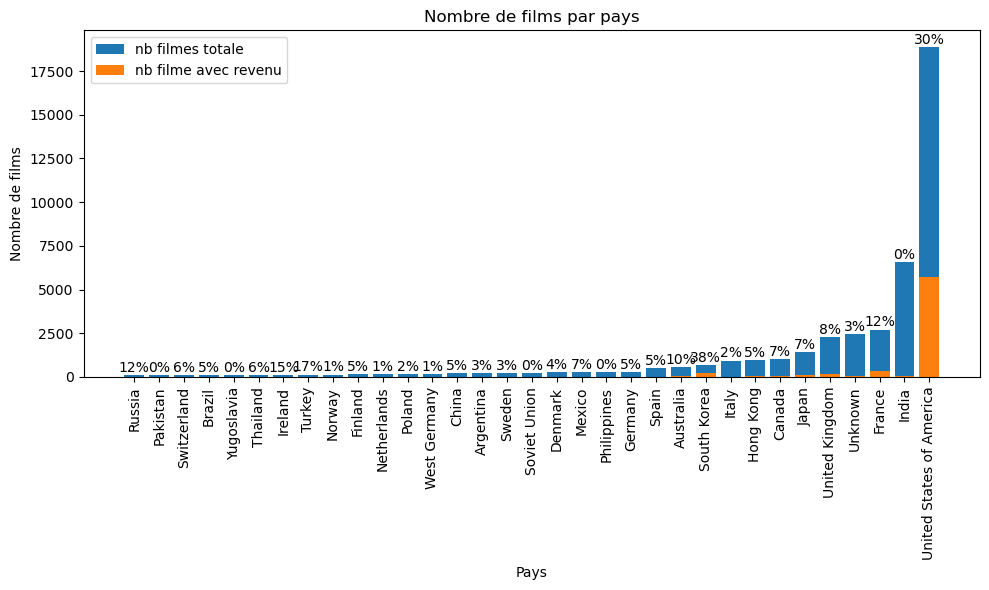

In [10]:
# Extraire les noms de pays et les valeurs de chaque dictionnaire
noms_pays = list(nombre_de_films_par_pays.keys())
nb_filmes_tot = list(nombre_de_films_par_pays.values())
nb_filmes_avec_revenu = list(nombre_de_films_par_pays_revenu.values())

# Créer une liste d'indices pour les positions des barres
indices = range(len(noms_pays))

# Créer l'histogramme
plt.figure(figsize=(10, 6))
barres_bleues = plt.bar(indices, nb_filmes_tot, label='nb filmes totale')
barres_oranges = plt.bar(indices, nb_filmes_avec_revenu, label='nb filme avec revenu')

# Ajouter des étiquettes et un titre
plt.xlabel('Pays')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par pays')
plt.xticks(indices, noms_pays, rotation=90)

# Ajouter le rapport au-dessus de chaque barre
for i, barre_bleue in enumerate(barres_bleues):
    hauteur_barre_bleue = barre_bleue.get_height()
    hauteur_barre_orange = barres_oranges[i].get_height()
    rapport = hauteur_barre_orange/hauteur_barre_bleue *100
    plt.text(barre_bleue.get_x() + barre_bleue.get_width() / 2, hauteur_barre_bleue + 5, f'{rapport:.0f}%', ha='center', va='bottom')


# Ajouter une légende
plt.legend()

# Afficher l'histogramme
plt.tight_layout()
plt.show()







#### _fesons la mêmeanalyse en utilisant les langue des filme cette fois_

In [11]:
df = data_movie_restricted_1960.copy()
#mise en forme des langue maintenent c'est des liste de String
df['Languages'] = df['Languages'].str.extract(r'\"([\w\s]+)\"')
df['Languages'] = df['Languages'].apply(lambda x: [x] if pd.notna(x) else ['Unknown'])

#décomte des filme tourné par chaque langue
langages_list = df['Languages'].tolist()
stored_langages = sort_words(langages_list)#applatie les liste de langue et met la liste dans l'ordre
nombre_de_films_langages = create_words_database(stored_langages)#compte le nb de repetition de chaque langue
nombre_de_films_langages = dict(sorted(nombre_de_films_langages.items(), key=lambda item: item[1]))#classe les langue par ordre croisant de filme tourné
nombre_de_films_langages = {langue: valeurs for langue, valeurs in nombre_de_films_langages.items() if valeurs >= 100}#suprimme les langue qui ont tournémoin de 100 filmes

#décomte des filmes tourné avec revenu connu par chaque langue
langages_list = df.dropna(subset=['Revenue'])['Languages'].tolist()
stored_langages = sort_words(langages_list)#applatie les liste de langue et met la liste dans l'ordre
nombre_de_films_langages_revenu = create_words_database(stored_langages)#compte le nb de repetition de chaque langue
nombre_de_films_langages_revenu = dict(sorted(nombre_de_films_langages_revenu.items(), key=lambda item: item[1]))#classe les langue par ordre croisant de filme tourné

langue_100_film = list(nombre_de_films_langages.keys())
nombre_de_films_langages_revenu = {langue: valeurs for langue, valeurs in nombre_de_films_langages_revenu.items() if langue in langue_100_film}
nombre_de_films_langages_revenu.update({langue: 0 for langue in langue_100_film if langue not in nombre_de_films_langages_revenu})
nombre_de_films_langages_revenu = {langue: nombre_de_films_langages_revenu[langue] for langue in nombre_de_films_langages}

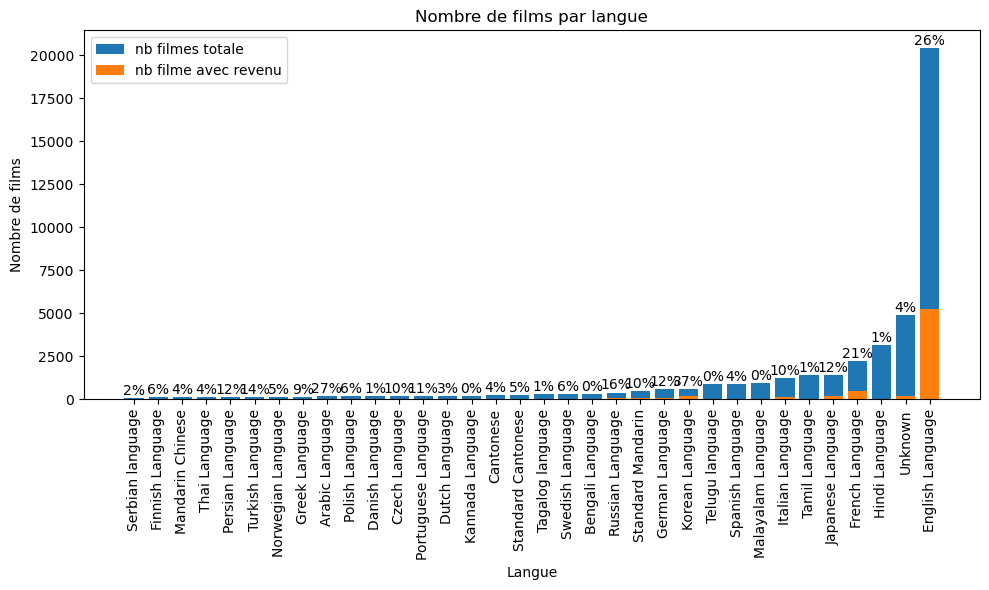

In [12]:
# Extraire les noms de langue et les valeurs de chaque dictionnaire
noms_langue = list(nombre_de_films_langages.keys())
nb_filmes_tot = list(nombre_de_films_langages.values())
nb_filmes_avec_revenu = list(nombre_de_films_langages_revenu.values())

# Créer une liste d'indices pour les positions des barres
indices = range(len(noms_langue))

# Créer l'histogramme
plt.figure(figsize=(10, 6))
barres_bleues = plt.bar(indices, nb_filmes_tot, label='nb filmes totale')
barres_oranges = plt.bar(indices, nb_filmes_avec_revenu, label='nb filme avec revenu')

# Ajouter des étiquettes et un titre
plt.xlabel('Langue')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par langue')
plt.xticks(indices, noms_langue, rotation=90)

# Ajouter le rapport au-dessus de chaque barre
for i, barre_bleue in enumerate(barres_bleues):
    hauteur_barre_bleue = barre_bleue.get_height()
    hauteur_barre_orange = barres_oranges[i].get_height()
    rapport = hauteur_barre_orange/hauteur_barre_bleue *100
    plt.text(barre_bleue.get_x() + barre_bleue.get_width() / 2, hauteur_barre_bleue + 5, f'{rapport:.0f}%', ha='center', va='bottom')


# Ajouter une légende
plt.legend()

# Afficher l'histogramme
plt.tight_layout()
plt.show()

#### Nous voyons que le pays où le pourcentage des filmes à revenu connus est le plus éléver est la Corrée du Sud mais le nombre de filmes total est beaucoups plus faible,donc pour notre tache il serais plus préférable d'utilisé les 30% des films des USA avec un revenue connu cela nous fait un total d'environ 5000 filmes.

### En Résumé:
#### De la grande base de donnée des filmes nous prendrons uniqument les filmes tourné aux Etats Unies, avec une date de parution et un revenu connu.
#### Nous analysrons les acteur qui ont joué dans les filmes plus résant que les années 1980 et nous prendrons en compte les filmes dans les quel ils ont participé avent.
#### _Allons y pour créé nosdataset restrain:_

In [46]:
colonne_name_movis = ['Wiki_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Release_date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
colonne_name_character = ['Wiki_movie_ID', 'Freebase_movie_ID', 'Release_date', 'Character_name', 'Birthday', 'Gender', 'Actor_height[m]', 'Actor_ethnicity','Actor_name','Actor_age','character/actor','character_ID','actor_ID']

#copie des database
df_movie_copie = data_movie.copy()
df_actor_copie = data_character.copy()

#mise en forme de la date dans les acteur
df_actor_copie['Release_date'] = df_actor_copie['Release_date'].apply(lambda x: str(x) + '-01' if len(str(x)) == 7 else x)#ajoute un mois et un jour au filme qui en ont pas
df_actor_copie['Release_date'] = df_actor_copie['Release_date'].apply(lambda x: str(x) + '-01-01' if len(str(x)) == 4 else x)#ajoute un mois et un jour au filme qui en ont pas
df_actor_copie['Release_date'] = pd.to_datetime(df_actor_copie['Release_date'], errors='coerce')#convertieles date en format de date

#mise en forme de la date dans les filmes
df_movie_copie['Release_date'] = df_movie_copie['Release_date'].apply(lambda x: str(x) + '-01' if len(str(x)) == 7 else x)#ajoute un mois et un jour au filme qui en ont pas
df_movie_copie['Release_date'] = df_movie_copie['Release_date'].apply(lambda x: str(x) + '-01-01' if len(str(x)) == 4 else x)#ajoute un mois et un jour au filme qui en ont pas
df_movie_copie['Release_date'] = pd.to_datetime(df_movie_copie['Release_date'], errors='coerce')#convertieles date en format de date
df_movie_copie = df_movie_copie.sort_values(by='Release_date')#classe lesdonnée en fonction de date

#mise en forme des pays maintenent c'est des liste de String
df_movie_copie['Countries'] = df_movie_copie['Countries'].str.extract(r'\"([\w\s]+)\"')
df_movie_copie['Countries'] = df_movie_copie['Countries'].apply(lambda x: [x] if pd.notna(x) else ['Unknown'])

In [47]:
#Supprimer delaliste desacteur tout les acteur sans ages (date de nessance)
df_actor_copie = df_actor_copie.dropna(subset=['Birthday'])
#trouver tout les acteur qui ont joué dans les filmes plus récant que 1990
actors_1990 = df_actor_copie[df_actor_copie['Release_date'].dt.year >= 1990]['Actor_name'].tolist()

#trouver tout les filme ou ces acteur ont joué
df_actor_copie = df_actor_copie[df_actor_copie['Actor_name'].isin(actors_1990)]
films_list = df_actor_copie['Wiki_movie_ID'].tolist()
films_list = list(set(films_list))

#Filtrer tout les filmes qui n'ont pas d'acteur qui on jouer apres l'année 1980
df_movie_copie = df_movie_copie[df_movie_copie['Wiki_movie_ID'].isin(films_list)]
#Selectionné uniqument lesfilme des USA
df_movie_copie = df_movie_copie[df_movie_copie['Countries'].apply(lambda x: 'United States of America' in x)]
#Supprimer les filmes sans date de parution
df_movie_copie = df_movie_copie.dropna(subset=['Release_date'])
#Supprimer les filmes sans revenu
df_movie_copie = df_movie_copie.dropna(subset=['Revenue'])#c'est notre base de donnée de filme

#filtrer la dfdes acteur pour avoir que les filme et acteur qui nous interesse
films_list = df_movie_copie['Wiki_movie_ID'].tolist()
df_actor_copie = df_actor_copie[df_actor_copie['Wiki_movie_ID'].isin(films_list)]#c'est notre base de donnée d'acteur

#### _Fesons quelque representation graphique pour mieux commprandre les donnés_
1. comptons le les filmes réalisé par les acteur

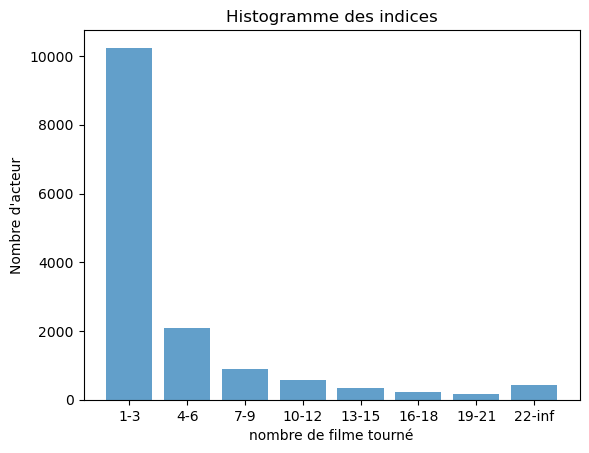

In [56]:
actors_names = df_actor_copie['Actor_name'].tolist()#liste de tout les acteurs qui nous interesse avec une repetition par filme tourné

nb_mov_with_actor = create_words_database(sorted(actors_names))#compte le nb de repetition de chaque langue
nb_mov_with_actor = dict(sorted(nb_mov_with_actor.items(), key=lambda item: item[1]))#classe les langue par ordre croisant de filme tourné

# Définir les intervalles
intervalles = [3, 6, 9, 12, 15, 18, 21]

# Initialiser un dictionnaire pour stocker le nombre de personnes dans chaque intervalle
personnes_par_intervalle = {i: 0 for i in range(len(intervalles) + 1)}

# Compter le nombre de personnes dans chaque intervalle
for personne, indice in nb_mov_with_actor.items():
    for i, seuil in enumerate(intervalles):
        if indice <= seuil:
            personnes_par_intervalle[i] += 1
            break
    else:
        personnes_par_intervalle[len(intervalles)] += 1

# Tracer l'histogramme
plt.bar(personnes_par_intervalle.keys(), personnes_par_intervalle.values(), align='center', alpha=0.7)
plt.xticks(list(personnes_par_intervalle.keys()), [f"{i+1}-{j}" for i, j in zip([0] + intervalles, intervalles + [float('inf')])])
plt.xlabel('nombre de filme tourné')
plt.ylabel("Nombre d'acteur")
plt.title('Histogramme des indices')
plt.show()

#### Comme on peut le voir la mageur partie des acteur au quel on s'interesse on tourné 1 ou 2 filmes, ces acteur nous interesserons pas dans tout nos sous question car notre recherche ce portera sur la carière d'un acteur et il est dur de nomé comme carière si l'acteur a jouer uniqument dans un filmes